This Analysis is to predict the surviving rate of Titanic


In [68]:
#import the library
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
# load the data to a Pandas dataframe
titanic=pd.read_csv("train.csv")

In [3]:
#check the dataframe 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


- There are 12 data points in the dataframe and 891 records
- columns 'Age', 'Cabin' and 'Embarked' have missing data
- Some of the attributes are numerical, e.g. 'Age' or Fare. Some of the attributes are categorical such as 'Name','Sex',or 'Ticket'

In [4]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
# dive into the missing data
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# descriptive stats on the dataframe
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Stranden, Mr. Juho",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


1. PassengerID is a sequene number holds for each records. It could be convertied to the index or be removed. If convered, we have to deal with the 0 value in the passengerId. Thus, I will remove it. 
2. Survived is the target which the model try to predict. 
3. Pclass is another feature we assumed impacting the survive. Pclass clearly has a linear relation ship with Fare so Fare could be dropped. 
4. Name of passenger contains the title of the passenger and will tell the social status of the passenger. Keep this for further feature engineering.
5. Sex is an important parameter. Based on the history of Titanic, we know that female had a higher chances of survival. 
6. Age - we do not know how age could affect the survival at this point. Its mean is 30 while the max is 80. The age is wide spread among the passengers. 
7. Sibsp and Parch are kept for feature engineering. 
8. Ticket has 681 categories and it looks like two much noise in this columns, drop it.
9. Cabin has too many missing value (204/891), drop it. 
10. Embarked has 2 missing record which is acceptable. Although it has not obvious relationship with the survival, it may affect where do passenger stays on Titanic and affact their access to the safety boats. 



In [7]:
# remove features has no significant impact on the surviving on the passenger
titanic2=titanic.drop(['PassengerId','Ticket','Fare','Cabin'], axis=1)
titanic2.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S


In [8]:
titanic2.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

# Data Cleaning and Replacing Missing Data

In [9]:
titanic2.loc[titanic2['Age']==80]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,S


In [10]:
titanic2[titanic2.isnull().Age].head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,Q


Obviousely, Age are related to the title in the name

In [11]:
# adding new column,Title,  by seperating Name with "," and "."
def name_extract(word):
    return word.split(',')[1].split('.')[0].strip()
titanic2['Name'].apply(name_extract).value_counts()



Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Mme               1
Jonkheer          1
the Countess      1
Don               1
Ms                1
Sir               1
Lady              1
Capt              1
Name: Name, dtype: int64

In [12]:
titanic2['Title']=titanic2['Name'].apply(name_extract)
titanic2.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Mr


In [13]:
# reduce the category into mr, mrs, miss, master, Other

def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Sir', 'Col']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [14]:
titanic2['Title']=titanic2.apply(replace_titles, axis=1)

In [15]:
titanic2.Title.value_counts()

Mr        531
Miss      185
Mrs       135
Master     40
Name: Title, dtype: int64

In [16]:
# Miss is the title for females before their get married. Let's check the age distriubtion of Miss
bins=[0,10,20,30,40,50,60,90]
bin_labels=['0-9','10-19','20-29','30-39','40-50','50-60','60-90']
# Add a bew attribute for age histogram
titanic2['age_group']=pd.cut(titanic2.Age, bins, right=False,labels=bin_labels)
titanic2.age_group[titanic2.Title=="Miss"].value_counts().sort_index()

0-9      30
10-19    36
20-29    43
30-39    28
40-50     5
50-60     6
60-90     1
Name: age_group, dtype: int64

Most of passengers with a title of Miss are in 20-29 of age which means the title attribute is done correctly

In [17]:
# describe age attributes before replace missing data
titanic2.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
#replace the missing value with the median of each Title group
titanic2.loc[titanic2.Age.isnull(),'Age'] = titanic2.groupby('Title').Age.transform('median').round(1)

In [19]:
# describe age attributes after replace missing data
titanic2.Age.describe()

count    891.000000
mean      29.377295
std       13.254246
min        0.420000
25%       21.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

the dataset after filling the missing data is not signicantly different from the befor dataset statistically speaking. 

Feature engineering: some of the attributes are representing similar feature and we are going to creat new features with the current attributes.

In [20]:
titanic2['FamilySize']=titanic2.SibSp+titanic2.Parch+1

In [21]:
titanic2.FamilySize.describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

In [22]:
Survivors_FamilySize=pd.crosstab(titanic2['Survived'],titanic2['FamilySize'], margins=True)
(Survivors_FamilySize/Survivors_FamilySize.All.loc['All']*100).round(2)

FamilySize,1,2,3,4,5,6,7,8,11,All
Survived,,,,,,,,,,
0,41.98,8.08,4.83,0.90,1.35,2.13,0.90,0.67,0.79,61.62
1,18.29,9.99,6.62,2.36,0.34,0.34,0.45,0.00,0.00,38.38
All,60.27,18.07,11.45,3.25,1.68,2.47,1.35,0.67,0.79,100.00


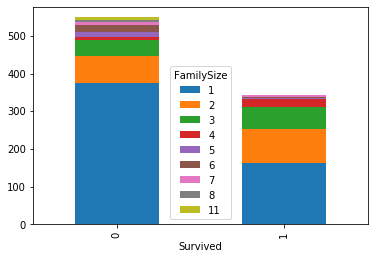

In [23]:
pd.crosstab(titanic2['Survived'],titanic2['FamilySize']).plot(kind='bar', stacked= True)

FamilySize of 1 has the highest change of survival among all other familysize group.

In [24]:
titanic2.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Title,age_group,FamilySize
count,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,889,891,714,891.000000
unique,NaN,NaN,891,2,NaN,NaN,NaN,3,4,7,NaN
top,NaN,NaN,"Stranden, Mr. Juho",male,NaN,NaN,NaN,S,Mr,20-29,NaN
freq,NaN,NaN,1,577,NaN,NaN,NaN,644,531,220,NaN
mean,0.383838,2.308642,NaN,NaN,29.377295,0.523008,0.381594,NaN,NaN,NaN,1.904602
std,0.486592,0.836071,NaN,NaN,13.254246,1.102743,0.806057,NaN,NaN,NaN,1.613459
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,NaN,NaN,1.000000
25%,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000
50%,0.000000,3.000000,NaN,NaN,30.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000
75%,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,NaN,NaN,2.000000


In [28]:
titanic2=titanic2.drop(['SibSp','Parch'],axis=1)

In [29]:
df=titanic2.drop(['Name','age_group'],axis=1)



In [30]:
df=df.replace('male',1)
df=df.replace('female',0)

In [31]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Embarked      2
Title         0
FamilySize    0
dtype: int64

C:\Users\zoe.xu\Documents\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\zoe.xu\Documents\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


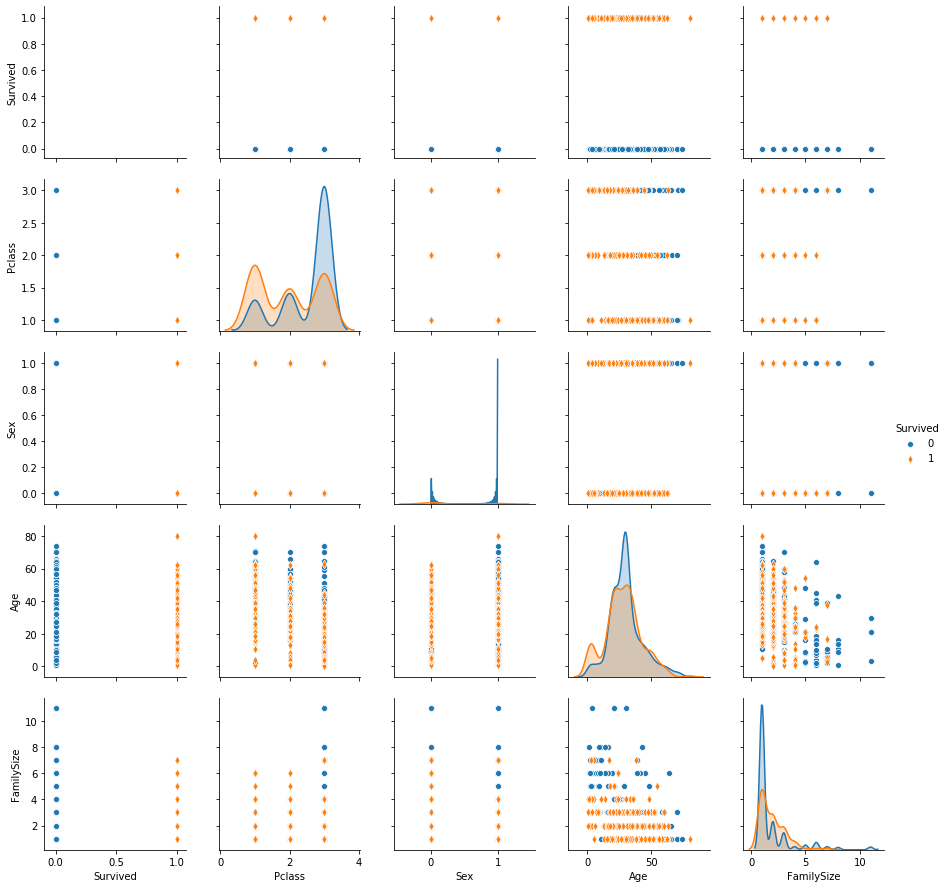

In [32]:
sns.pairplot(df, hue='Survived', markers=["o","d"])

In [33]:
# Class 1, Female, FamilyZsize of 1, Age aroung 20-30 has a higher change of survival.

Predict the survival
1. find the the model which fits the dataset and the prediction required.
2. split the data set into train and test
3. apply model(s) and find the optimal model
4. validate the model with test dataset


## Model

In [34]:
#import the library
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.linear_model import LogisticRegression


In [35]:
# I select logistic regression 

In [36]:
# split the data into tarin and test set

In [50]:
df.describe(include='all')

,Survived,Pclass,Sex,Age,Embarked,Title,FamilySize
count,891.000000,891.000000,891.000000,891.000000,889,891,891.000000
unique,NaN,NaN,NaN,NaN,3,4,NaN
top,NaN,NaN,NaN,NaN,S,Mr,NaN
freq,NaN,NaN,NaN,NaN,644,531,NaN
mean,0.383838,2.308642,0.647587,29.377295,NaN,NaN,1.904602
std,0.486592,0.836071,0.477990,13.254246,NaN,NaN,1.613459
min,0.000000,1.000000,0.000000,0.420000,NaN,NaN,1.000000
25%,0.000000,2.000000,0.000000,21.000000,NaN,NaN,1.000000
50%,0.000000,3.000000,1.000000,30.000000,NaN,NaN,1.000000
75%,1.000000,3.000000,1.000000,35.000000,NaN,NaN,2.000000


In [52]:
#scikit-learn needs the data organized as numpy
x=df.drop(['Survived','Embarked','Title'],axis=1).to_numpy()
y=df[["Survived"]].astype(float).to_numpy()


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/15)


In [54]:
# check the sample size
x_test.shape

(60, 4)

In [55]:
y_test.shape

(60, 1)

In [56]:
# fit the model
logreg=LogisticRegression()
logreg.fit(x,y)

C:\Users\zoe.xu\Documents\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zoe.xu\Documents\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
logreg.score(x_test,y_test)

0.8833333333333333

the score is 88.33

In [59]:
# try to drop some sttributes to see if we could improve, e.g. FamilySize
x=df.drop(['Survived','Embarked','Title','FamilySize'],axis=1).to_numpy()
y=df[["Survived"]].astype(float).to_numpy()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/15)
logreg=LogisticRegression()
logreg.fit(x,y)
logreg.score(x_test,y_test)

C:\Users\zoe.xu\Documents\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zoe.xu\Documents\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8333333333333334

In [60]:
#the datset without FamilySize is slightly better


## Validate the model

In [62]:
# Apply  the model with test datset
prediction=logreg.predict(x_test)
prediction

array([0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0.])

In [64]:
# evaluate the test result
logreg.score(x_test,y_test)

0.8333333333333334

In [71]:
np.unique(prediction, return_counts=True)

(array([0., 1.]), array([42, 18], dtype=int64))

the result from the tarin and test are similar. the model is validated